In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-prices/Laptop-Price.csv


In [2]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/kaggle/input/laptop-prices/Laptop-Price.csv')
print(f'data shape',df.shape)
df.head()

data shape (1146, 18)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Unnamed: 16,Price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,NaN,575.0
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,NaN,400.0
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,NaN,1495.0
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,NaN,770.0
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,NaN,393.9


In [3]:
df.isnull().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
Ram                    0
OpSys                  0
Cpu Brand              0
Cpu Model              0
Cpu Rate               0
SSD                    0
HDD                    0
Flash Storage          0
Hybrid                 0
Gpu Brand              0
Gpu Model              0
Unnamed: 16         1146
Price_euros            0
dtype: int64

In [4]:
df=df.drop(['Unnamed: 16'],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1146 non-null   object 
 1   Product           1146 non-null   object 
 2   TypeName          1146 non-null   object 
 3   Inches            1146 non-null   float64
 4   ScreenResolution  1146 non-null   object 
 5   Ram               1146 non-null   object 
 6   OpSys             1146 non-null   object 
 7   Cpu Brand         1146 non-null   object 
 8   Cpu Model         1146 non-null   object 
 9   Cpu Rate          1146 non-null   object 
 10  SSD               1146 non-null   int64  
 11  HDD               1146 non-null   int64  
 12  Flash Storage     1146 non-null   int64  
 13  Hybrid            1146 non-null   int64  
 14  Gpu Brand         1146 non-null   object 
 15  Gpu Model         1146 non-null   object 
 16  Price_euros       1146 non-null   float64


In [6]:
df.columns=df.columns.str.lower()
df.head()

,company,product,typename,inches,screenresolution,ram,opsys,cpu brand,cpu model,cpu rate,ssd,hdd,flash storage,hybrid,gpu brand,gpu model,price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,575.0
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,400.0
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,1495.0
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,770.0
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,393.9


In [7]:
#some feature exraction 
df['cpu_gen'] = df['cpu model'].str.extract(r'(\d{1,2})', expand=False).astype(float)
df['is_dedicated_gpu'] = df['gpu brand'].apply(lambda x: 0 if 'Intel' in x else 1)
df['is_touch'] = df['screenresolution'].str.contains('Touchscreen', case=False, na=False).astype(int)
df['is_full_hd'] = df['screenresolution'].str.contains('1920x1080').astype(int)
df['res_x'] = df['screenresolution'].str.extract(r'(\d+)x', expand=False).astype(float)
df['res_y'] = df['screenresolution'].str.extract(r'x(\d+)', expand=False).astype(float)
df['pixel_count'] = df['res_x'] * df['res_y']
df['ram_gb'] = df['ram'].str.replace('GB', '').astype(int)

top_companies = df['company'].value_counts().nlargest(5).index
df['company_grouped'] = df['company'].apply(lambda x: x if x in top_companies else 'Other')

df['cpu_rate_ghz'] = df['cpu rate'].str.replace('GHz', '', regex=False).str.strip().astype(float)

df.drop(['cpu model', 'gpu brand', 'screenresolution', 'ram', 'company','cpu rate'], axis=1, inplace=True)
df.head()

,product,typename,inches,opsys,cpu brand,ssd,hdd,flash storage,hybrid,gpu model,...,cpu_gen,is_dedicated_gpu,is_touch,is_full_hd,res_x,res_y,pixel_count,ram_gb,company_grouped,cpu_rate_ghz
0,250 G6,Notebook,15.6,No OS,Intel,256,0,0,0,HD Graphics 620,...,5.0,0,0,1,1920.0,1080.0,2073600.0,8,HP,2.5
1,Aspire 3,Notebook,15.6,Windows 10,AMD,0,500,0,0,Radeon R5,...,9.0,1,0,0,1366.0,768.0,1049088.0,4,Acer,3.0
2,ZenBook UX430UN,Ultrabook,14.0,Windows 10,Intel,512,0,0,0,GeForce MX150,...,7.0,1,0,1,1920.0,1080.0,2073600.0,16,Asus,1.8
3,Swift 3,Ultrabook,14.0,Windows 10,Intel,256,0,0,0,UHD Graphics 620,...,5.0,0,0,1,1920.0,1080.0,2073600.0,8,Acer,1.6
4,250 G6,Notebook,15.6,No OS,Intel,0,500,0,0,HD Graphics 620,...,5.0,0,0,0,1366.0,768.0,1049088.0,4,HP,2.5


In [8]:
df['typename']=df['typename'].map({'Notebook':0,'Gaming':1,'Ultrabook':2,'2 in 1 Convertible':3,'Workstation':4,'Netbook':5})
df['company_grouped']=df['company_grouped'].map({'Dell':0,'Lenovo':1,'HP':2,'Other':3,'Asus':4,'Acer':5})
df['cpu brand']=df['cpu brand'].map({'Intel':0,'AMD':1})
df.head()



,product,typename,inches,opsys,cpu brand,ssd,hdd,flash storage,hybrid,gpu model,...,cpu_gen,is_dedicated_gpu,is_touch,is_full_hd,res_x,res_y,pixel_count,ram_gb,company_grouped,cpu_rate_ghz
0,250 G6,0,15.6,No OS,0,256,0,0,0,HD Graphics 620,...,5.0,0,0,1,1920.0,1080.0,2073600.0,8,2,2.5
1,Aspire 3,0,15.6,Windows 10,1,0,500,0,0,Radeon R5,...,9.0,1,0,0,1366.0,768.0,1049088.0,4,5,3.0
2,ZenBook UX430UN,2,14.0,Windows 10,0,512,0,0,0,GeForce MX150,...,7.0,1,0,1,1920.0,1080.0,2073600.0,16,4,1.8
3,Swift 3,2,14.0,Windows 10,0,256,0,0,0,UHD Graphics 620,...,5.0,0,0,1,1920.0,1080.0,2073600.0,8,5,1.6
4,250 G6,0,15.6,No OS,0,0,500,0,0,HD Graphics 620,...,5.0,0,0,0,1366.0,768.0,1049088.0,4,2,2.5


In [9]:
for col in ['product', 'opsys', 'gpu model']:
    freq = df[col].value_counts(normalize=True)
    df[f'{col}_freq'] = df[col].map(freq)
df=df.drop(['product','opsys','gpu model'],axis=1)
df.head()

,typename,inches,cpu brand,ssd,hdd,flash storage,hybrid,price_euros,cpu_gen,is_dedicated_gpu,...,is_full_hd,res_x,res_y,pixel_count,ram_gb,company_grouped,cpu_rate_ghz,product_freq,opsys_freq,gpu model_freq
0,0,15.6,0,256,0,0,0,575.0,5.0,0,...,1,1920.0,1080.0,2073600.0,8,2,2.5,0.014834,0.049738,0.245201
1,0,15.6,1,0,500,0,0,400.0,9.0,1,...,0,1366.0,768.0,1049088.0,4,5,3.0,0.007853,0.855148,0.009599
2,2,14.0,0,512,0,0,0,1495.0,7.0,1,...,1,1920.0,1080.0,2073600.0,16,4,1.8,0.000873,0.855148,0.013089
3,2,14.0,0,256,0,0,0,770.0,5.0,0,...,1,1920.0,1080.0,2073600.0,8,5,1.6,0.004363,0.855148,0.058464
4,0,15.6,0,0,500,0,0,393.9,5.0,0,...,0,1366.0,768.0,1049088.0,4,2,2.5,0.014834,0.049738,0.245201


In [10]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [11]:
from scipy.stats import skew
cols_to_check_skew = [
    'inches', 'cpu_rate_ghz', 'price_euros',
    'res_x', 'res_y', 'pixel_count', 'ram_gb'
]
skewness = df[cols_to_check_skew].apply(skew).sort_values(ascending=False)
print("Skewness of numerical features:\n", skewness)


Skewness of numerical features:
 pixel_count     3.204471
ram_gb          2.766161
res_x           2.347508
res_y           2.281193
price_euros     1.596380
inches         -0.223452
cpu_rate_ghz   -1.009971
dtype: float64


In [12]:

skewed_cols = ['pixel_count', 'ram_gb', 'res_x', 'res_y']
for col in skewed_cols:
    df[col + '_log'] = np.log1p(df[col])

In [13]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_cleaned = remove_outliers_iqr(df, numerical_cols)


In [14]:
df=df.dropna()

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

X = df.drop(columns='price_euros')  
y = df['price_euros']                

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),            
    ('model', RandomForestRegressor(random_state=42))
])

cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean CV R2 Score:", cv_scores.mean())

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print("Test Set R2 Score:", test_r2)


Cross-Validation R2 Scores: [0.73425233 0.79506348 0.81913556 0.72047373 0.81042458]
Mean CV R2 Score: 0.7758699361415385
Test Set R2 Score: 0.8135920845231996


In [16]:
y_pred_test = pipeline.predict(X_test)

df_test_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test
})

df_test_results.to_csv('test_predictions.csv', index=False)


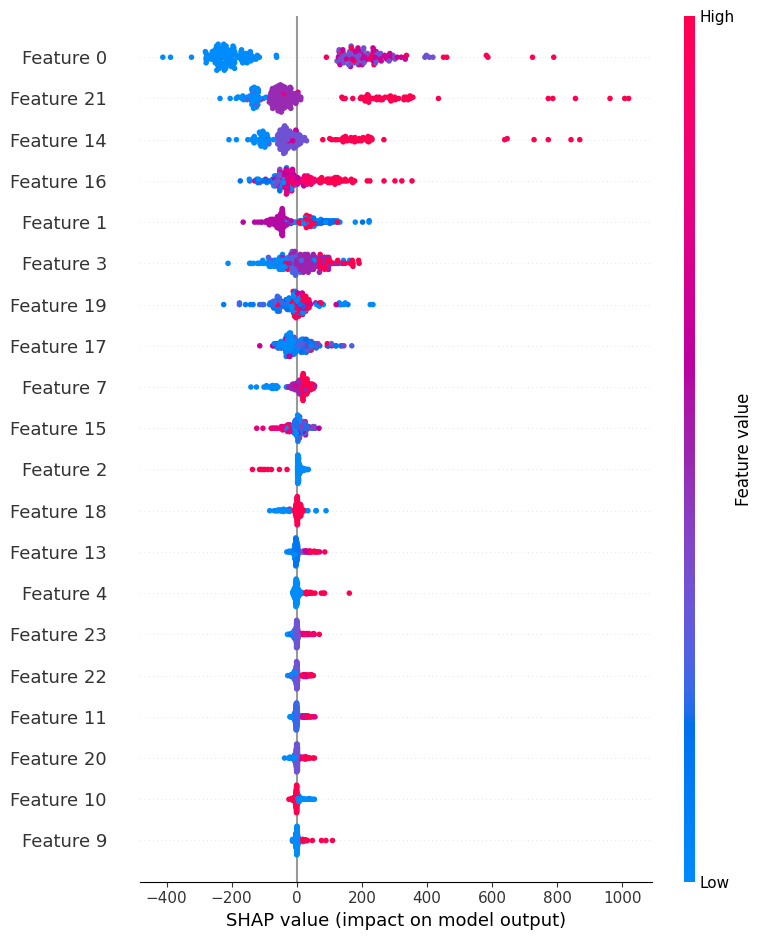

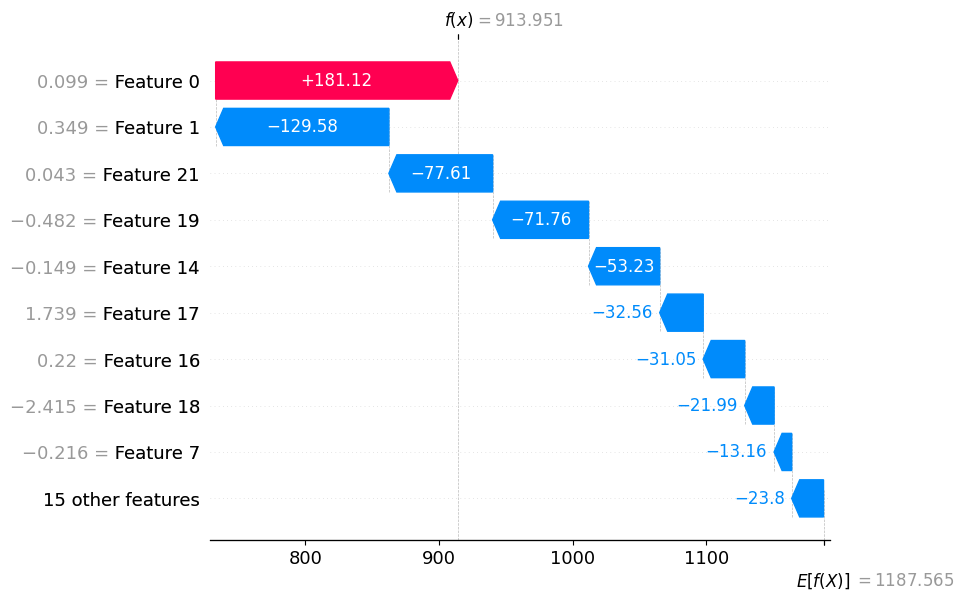

In [17]:
import shap

preprocessor = pipeline[:-1]

model = pipeline.named_steps['model']
X_test_processed = preprocessor.transform(X_test)
explainer = shap.Explainer(model)
shap_values = explainer(X_test_processed)
shap.summary_plot(shap_values, X_test_processed)
shap.plots.waterfall(shap_values[0])


In [18]:
txt_content = """
Laptop Price Prediction Model

Model Used: RandomForestRegressor

Cross-Validation R2 Scores: [0.7342, 0.7951, 0.8191, 0.7205, 0.8104]
Mean CV R2 Score: 0.776
Test Set R2 Score: 0.814

Project Description:
This project predicts laptop prices based on various features such as
company, product type, CPU details, RAM, screen resolution, storage,
and GPU information. The data preprocessing pipeline includes feature
engineering, handling skewness, and encoding categorical variables.
The model is trained and evaluated using cross-validation to ensure
robustness.

Author: Zahraa Alrubaie
Date: 04/06/2025

Thank you for reviewing the project!
"""
with open('LAPTOP_PRICE_PREDICTION_SUMMARY.txt', 'w') as f:
    f.write(txt_content)
